## Example of performing linear least squares fitting

First we import numpy and matplotlib as usual

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Now, let's generate some random data avout a trend line

In [2]:
#set a random number seed
np.random.seed(119)

#set number of data points 
npoints = 50

#set x
x = np.linspace(0,10.,npoints)

#set slope, intercept, and scatter rms
m = 2.0 #slope
b = 1.0 #intercept 
sigma = 2.0 #rms scatter in the noise

#generate y points 
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)

# Just plot the data!

Text(0, 0.5, 'y')

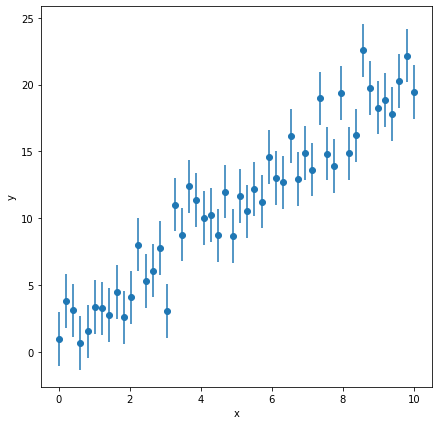

In [3]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

## Method #1, polyfit()

In [4]:
m_fit, b_fit = np.poly1d(np.polyfit(x,y,1,w=1./y_err))
print("Best fit slope = ",m_fit)
print("Best fit intercept = ",b_fit)

y_fit = m_fit*x + b_fit

Best fit slope =  1.9634043470399505
Best fit intercept =  1.283010681296193


### Plot result

1.9634043470399505
1.283010681296193


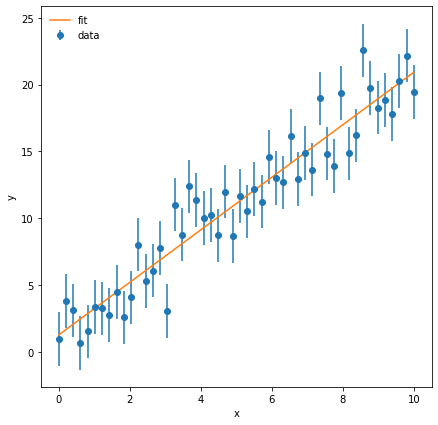

In [5]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o',label='data')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y_fit,label='fit')
plt.legend(loc=2,frameon=False)
print(m_fit)
print(b_fit)

## Method #2, scipy + optimize

In [6]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x, m, b):
    return m*x + b

#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit_2 = params[0]
b_fit_2 = params[1]
print(m_fit_2, b_fit_2)

1.9634043457508432 1.2830106890542259


In [7]:
print(m_fit, b_fit)

1.9634043470399505 1.283010681296193


Text(0.5, 1.0, 'Using optimize.curve_fit')

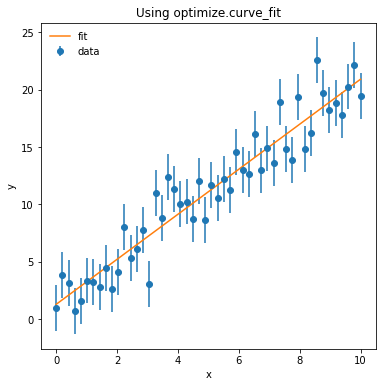

In [8]:
f = plt.figure(figsize=(6,6))
plt.errorbar(x,y,sigma,fmt='o',label='data')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,m_fit_2*x + b_fit_2,label='fit')
plt.legend(loc=2,frameon=False)
plt.title("Using optimize.curve_fit")

# Perform a more complicated fit

In [9]:
#redifine x and y

Text(0, 0.5, 'y')

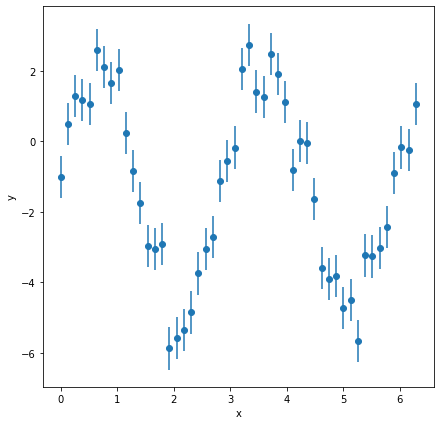

In [10]:
mpoints = 50 
x = np.linspace(0., 2*np.pi, npoints)

#make a complicates function
a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.6

y = a*np.sin(b*x + c) + d +np.random.normal(scale=sig, size=npoints)
y_err = np.full(npoints,sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

## Perform a fit using scipy

In [11]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_curve(x, a, b, c, d):
    return a*np.sin(b*x + c) + d

#perform the fit
params, params_cov = optimize.curve_fit(f_curve,x,y,sigma=y_err,p0=(1,2.,0.1,-0.1))

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = a_fit*np.sin(b_fit*x + c_fit) + d_fit

3.484887737606183 2.0987157450903156 0.24946478719386894 -1.3321535893901284


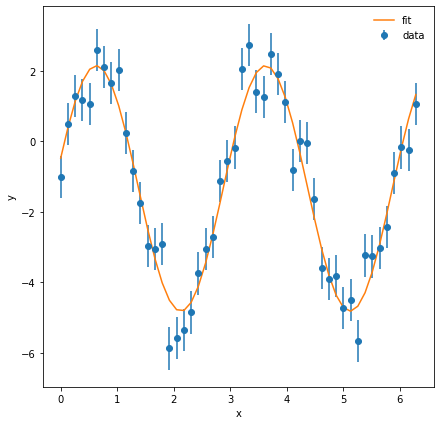

In [12]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr = y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)